<a href="https://colab.research.google.com/github/Aria011/CODSOFT/blob/main/Credit_Card_Transactions_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

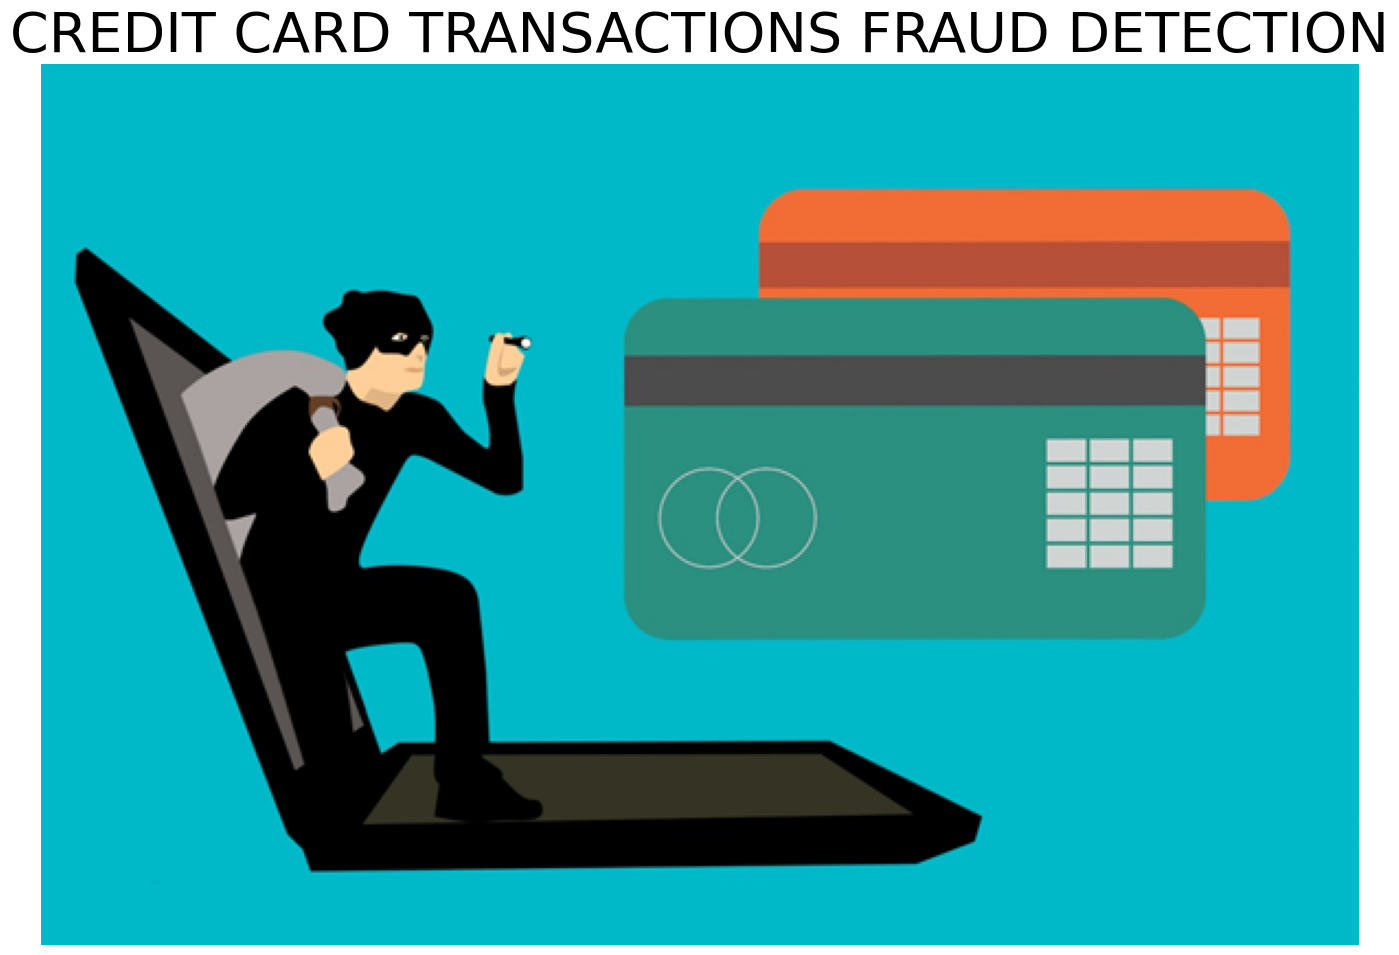

**Importing required libraries and packages**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


**Load the dataset**

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/Codsoft Internship/ML/credit_card/fraudTrain.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Codsoft Internship/ML/credit_card/fraudTest.csv")


In [3]:
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

**Print the shape of data**

In [7]:
df_train.shape

(1296675, 23)

In [8]:
df_test.shape

(555719, 23)

**Combine train data and test data**

In [9]:
df = pd.concat([df_train,df_test],ignore_index=True)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


**Checking duplicate values**

In [10]:
df.duplicated().sum()

0

**Checking missing values**

In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [12]:
df.drop(["Unnamed: 0","cc_num","trans_date_trans_time","merchant","first","last","dob"],axis=1,inplace=True)
df

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [13]:
df.dtypes

,0
category,object
amt,float64
gender,object
street,object
city,object
state,object
zip,int64
lat,float64
long,float64
city_pop,int64


**EDA**

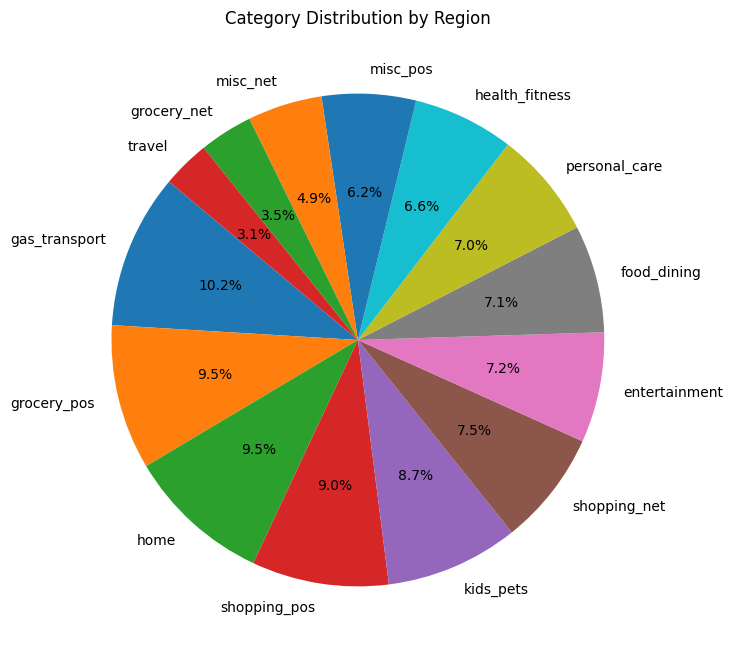

In [14]:
s = df['category'].value_counts()
plt.figure(figsize=(8, 8))
# plt.figure(facecolor='#d1d0d0')
plt.pie(s.values, labels=s.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution by Region')
plt.show()

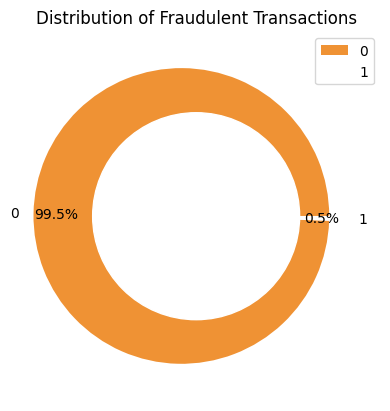

In [15]:
t=df['is_fraud'].value_counts()
lbl=["0","1"]
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(t,labels=lbl,explode=[0.1,0],colors=["#EF9234","white"],autopct='%1.1f%%', pctdistance=0.85)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Fraudulent Transactions')
plt.legend()
plt.show()

<Axes: xlabel='gender'>

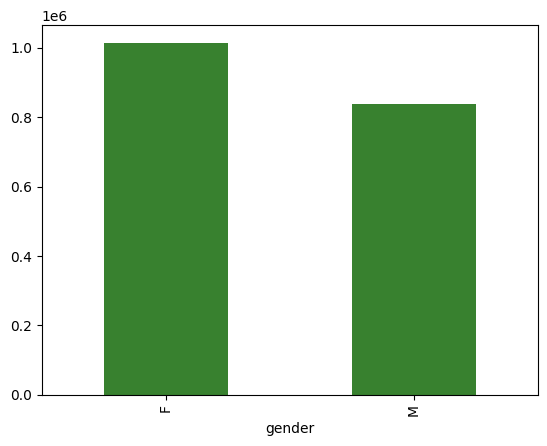

In [16]:
df['gender'].value_counts().plot(kind='bar',color="#38812F")

**Converting object dtype to numerical using LabelEncoder**

In [17]:
encoder=LabelEncoder()
labels=["category","gender","street","city","state","job","trans_num"]
for label in labels:
  df[label]=encoder.fit_transform(df[label])
df

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,576,532,27,28654,36.0788,-81.1781,3495,372,80326,1325376018,36.011293,-82.048315,0
1,4,107.23,0,439,619,47,99160,48.8878,-118.2105,149,431,227462,1325376044,49.159047,-118.186462,0
2,0,220.11,1,610,474,13,83252,42.1808,-112.2620,4154,308,1169030,1325376051,43.150704,-112.154481,0
3,2,45.00,1,945,84,26,59632,46.2306,-112.1138,1939,330,777909,1325376076,47.034331,-112.561071,0
4,9,41.96,1,422,217,45,24433,38.4207,-79.4629,99,116,1186866,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,5,43.77,1,573,471,24,63453,40.4931,-91.8912,519,477,1122239,1388534347,39.946837,-91.333331,0
1852390,7,111.84,1,583,427,43,77566,29.0393,-95.4401,28739,207,235369,1388534349,29.661049,-96.186633,0
1852391,7,86.88,0,138,110,47,99323,46.1966,-118.9017,3684,307,783898,1388534355,46.658340,-119.715054,0
1852392,13,7.99,1,711,508,13,83643,44.6255,-116.4493,129,63,145946,1388534364,44.470525,-117.080888,0


In [18]:
X=df.iloc[:,:-1]
X

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long
0,8,4.97,0,576,532,27,28654,36.0788,-81.1781,3495,372,80326,1325376018,36.011293,-82.048315
1,4,107.23,0,439,619,47,99160,48.8878,-118.2105,149,431,227462,1325376044,49.159047,-118.186462
2,0,220.11,1,610,474,13,83252,42.1808,-112.2620,4154,308,1169030,1325376051,43.150704,-112.154481
3,2,45.00,1,945,84,26,59632,46.2306,-112.1138,1939,330,777909,1325376076,47.034331,-112.561071
4,9,41.96,1,422,217,45,24433,38.4207,-79.4629,99,116,1186866,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,5,43.77,1,573,471,24,63453,40.4931,-91.8912,519,477,1122239,1388534347,39.946837,-91.333331
1852390,7,111.84,1,583,427,43,77566,29.0393,-95.4401,28739,207,235369,1388534349,29.661049,-96.186633
1852391,7,86.88,0,138,110,47,99323,46.1966,-118.9017,3684,307,783898,1388534355,46.658340,-119.715054
1852392,13,7.99,1,711,508,13,83643,44.6255,-116.4493,129,63,145946,1388534364,44.470525,-117.080888


In [19]:
y=df.iloc[:,-1]
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
1852389,0
1852390,0
1852391,0
1852392,0


**Check the data is balanced**

In [20]:
y.value_counts()

,count
is_fraud,
0,1842743
1,9651


**Oversampling due to imbalanced data**

In [21]:
os=SMOTE()
X_os,y_os=os.fit_resample(X,y)

In [22]:
X_os.shape

(3685486, 15)

In [23]:
y_os.shape

(3685486,)

In [24]:
scaler=StandardScaler()
scaler=StandardScaler()
X_os_scaled=scaler.fit_transform(X_os,y_os)

**Model Building**

DecisionTreeClassifier(random_state=1)
0.9861031469385318
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    552493
           1       0.98      0.99      0.99    553153

    accuracy                           0.99   1105646
   macro avg       0.99      0.99      0.99   1105646
weighted avg       0.99      0.99      0.99   1105646

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier(random_state=1)
0.9979170548258665
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552493
           1       1.00      1.00      1.00    553153

    accuracy                           1.00   1105646
   macro avg       1.00      1.00      1.00   1105646
weighted avg       1.00      1.00      1.00   1105646

-----------------------------

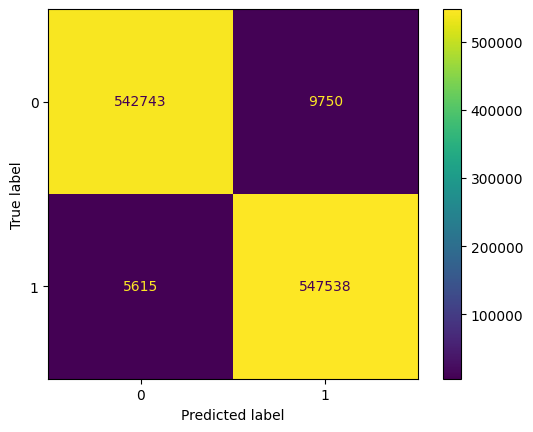

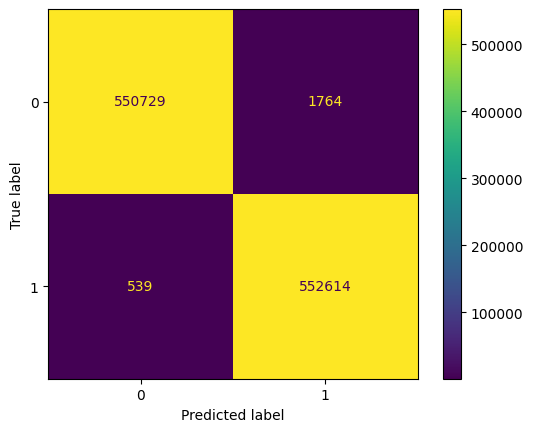

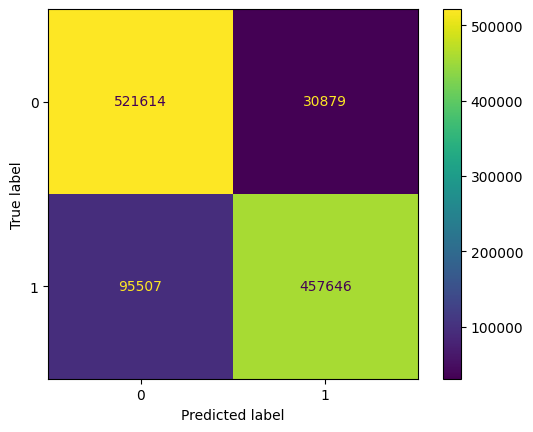

In [25]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=1)
dec=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
lr=LogisticRegression(random_state=1)

r=[]
model=[dec,rf,lr]
for i in model:
  print(i)
  i.fit(X_os_train,y_os_train)
  y_os_pred=i.predict(X_os_test)
  r.append({"Model":i.__class__.__name__, "Accuracy":accuracy_score(y_os_test,y_os_pred)})
  print(accuracy_score(y_os_test,y_os_pred))
  print(classification_report(y_os_test,y_os_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred))
  print("-"*200)

**Checking accuracy**


In [30]:
accuracy=pd.DataFrame(r)
accuracy

,Model,Accuracy
0,DecisionTreeClassifier,0.986103
1,RandomForestClassifier,0.997917
2,LogisticRegression,0.885690


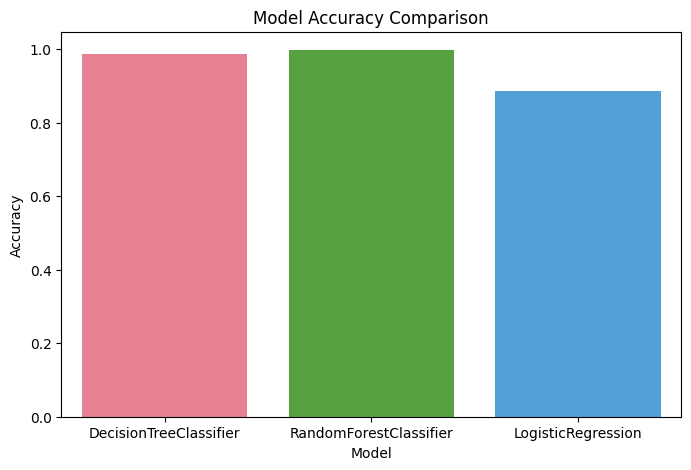

In [110]:
accuracy_df = pd.DataFrame(r)
palette = sns.color_palette("husl", len(accuracy_df))
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=palette)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


**Predicting the custom values**

In [32]:
y_new=rf.predict(scaler.transform([[7,111.84,1,583,427,43,77566,29.0393,-95.4401,28739,207,235369,1388534349,29.661049,-96.186633]]))
result=y_new.item()
if result==0:
  print(" Not a fraud transaction ")

else:
    print("Fraud transaction ")

 Not a fraud transaction 
